In [1]:
import sys
import os

# 프로젝트 루트 추가 (노트북이 있는 디렉토리)
project_root = os.path.dirname(os.path.abspath("__file__")) if "__file__" in globals() else os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from workflow.rag_agent_workflow_part1 import app_part1, AgentState
from workflow.classes import create_initial_state

from test.test_data_loader import test_data_loader_v1

# task_id = "session-20251002-052932-151e52e9" # 10만개 데이터
task_id = "session-20251002-040520-28a9dc6c" # 정호주임 pc
# task_id = "session-20250930-133411-99e3becc"
# task_id = "session-20251001-151642-1ff9e24a"
job_id = "test+job_id"

print("🔄 아티팩트 생성 중...")
artifacts = test_data_loader_v1(task_id, months=12)

print(f"\n✅ 총 {len(artifacts):,}개 아티팩트 로드 완료")

E0000 00:00:1760861861.264548 4292190 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760861861.266197 4292190 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760861861.266657 4292190 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


✅ Graph compiled successfully!
✅ Part 1 Graph compiled successfully (데이터 로딩 및 저장)!
🔄 아티팩트 생성 중...
2025-10-19 17:17:41,486 - test.testAnalyzer - INFO - 🚀 [TEST] Starting filtering test for task: session-20251002-040520-28a9dc6c
2025-10-19 17:17:41,486 - DevAnaly - DEBUG - Starting data load for category: BROWSER
[2025-10-19 17:17:41] DataEncoder - Converted WebKit urls.last_visit_time to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit visits.visit_time to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit downloads.start_time to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit downloads.end_time to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit downloads.last_access_time to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit logins.date_created to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit logins.date_last_used to datetime
[2025-10-19 17:17:41] DataEncoder - Converted WebKit logins.date_received to datetim

2025-10-19 17:17:42,473 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): mermaid.ink:443
2025-10-19 17:17:42,599 - urllib3.connectionpool - DEBUG - https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCXJlY3Vyc2l2ZV9maWx0ZXIocmVjdXJzaXZlX2ZpbHRlcikKCWV4dHJhY3RfYXJ0aWZhY3RzKGV4dHJhY3RfYXJ0aWZhY3RzKQoJc2F2ZV9kYXRhKHNhdmVfZGF0YSkKCV9fZW5kX18oWzxwPl9fZW5kX188L3A+XSk6OjpsYXN0CglfX3N0YXJ0X18gLS0+IHJlY3Vyc2l2ZV9maWx0ZXI7CglleHRyYWN0X2FydGlmYWN0cyAtLT4gc2F2ZV9kYXRhOwoJcmVjdXJzaXZlX2ZpbHRlciAtLiAmbmJzcDtzeW50aGVzaXplJm5ic3A7IC4tPiBleHRyYWN0X2FydGlmYWN0czsKCXNhdmVfZGF0YSAtLT4gX19lbmRfXzsKCXJlY3Vyc2l2ZV9maWx0ZXIgLS4gJm5ic3A7Y29udGludWUmbmJzcDsgLi0+IHJlY3Vyc2l2ZV9maWx0ZXI7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxLjIKCWNsYXNzRGVmIGZpcnN0IGZpbGwtb3BhY2l0eTowCgljbGFzc0RlZiBsYXN0IGZpbGw6I2JmYjZmYwo=?type=png&bgColor=!white HTTP/1.1" 200 18716


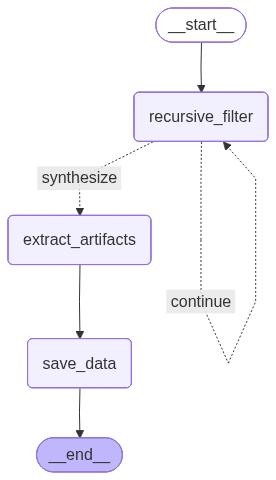

In [3]:
from IPython.display import Image, display
display(Image(app_part1.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
print(f"\n🚀 분석 시작...")

initial_state = create_initial_state(
    job_id=job_id,
    task_id=task_id,
    job_info={},
    artifact_chunks=[artifacts],
    intermediate_results=[],
    filter_iteration=0,
    target_artifact_count=100_000,
    current_strictness="very_strict",
    raw_user_requirements=""
)

import time
from typing import cast
start_time = time.time()

initial_state = cast(AgentState, initial_state)
final_state = app_part1.invoke(initial_state)
elapsed_time = time.time() - start_time

print(f"\n⏱️  총 처리 시간: {elapsed_time:.1f}초 ({elapsed_time/60:.1f}분)")
print(f"🔍 필터링된 중요 아티팩트: {sum(len(r.important_artifacts) for r in final_state['intermediate_results'])}개")



🚀 분석 시작...
2025-10-19 17:17:42,618 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): api.smith.langchain.com:443

🔄 필터링 반복 1/3: VERY_STRICT
  - 입력: 원본 아티팩트
  - 현재 아티팩트: 5,540개
  - 필터링 강도: very_strict
  - 목표 비율: 1.5%
  - 목표 개수: 100,000개
  - 총 청크 수: 19개

📦 총 1개 배치로 처리

📦 배치 1/1 (청크 1-19)...
2025-10-19 17:17:42,803 - urllib3.connectionpool - DEBUG - https://api.smith.langchain.com:443 "GET /info HTTP/1.1" 200 817
2025-10-19 17:17:42,804 - langsmith.client - DEBUG - Tracing control thread func compress parallel called
2025-10-19 17:17:42,863 - langsmith.client - DEBUG - Sending multipart request to https://api.smith.langchain.com with context: trace=ab412faa-8a3d-4bb6-af6c-ce06d48198ef,id=ab412faa-8a3d-4bb6-af6c-ce06d48198ef; trace=ab412faa-8a3d-4bb6-af6c-ce06d48198ef,id=cdea8ca2-c6fd-4bda-a4d1-7a04244d16c8; trace=72cddcf1-163a-4fbd-a20d-9cdf4b8f89ee,id=72cddcf1-163a-4fbd-a20d-9cdf4b8f89ee; trace=72cddcf1-163a-4fbd-a20d-9cdf4b8f89ee,id=372e0853-1cf7-44af-8eb0-5c7e6c25e

E0000 00:00:1760861874.192757 4292190 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760861874.194709 4292190 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


2025-10-19 17:17:54,770 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): us.i.posthog.com:443
2025-10-19 17:17:55,211 - urllib3.connectionpool - DEBUG - https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 202 34
2025-10-19 17:17:55,351 - urllib3.connectionpool - DEBUG - https://us.i.posthog.com:443 "POST /batch/ HTTP/1.1" 200 15
  ✅ 2455개 아티팩트 저장 완료
  📁 위치: ./chroma/artifacts_collection
--- ✅ Node: 데이터 저장 성공 (2455개) ---

⏱️  총 처리 시간: 76.1초 (1.3분)
🔍 필터링된 중요 아티팩트: 0개


2025-10-19 17:18:59,276 - langsmith.client - DEBUG - Sending compressed multipart request with context: trace=ab412faa-8a3d-4bb6-af6c-ce06d48198ef,id=0ba73798-966c-4dc4-8790-35216b605f25; trace=ab412faa-8a3d-4bb6-af6c-ce06d48198ef,id=ab412faa-8a3d-4bb6-af6c-ce06d48198ef
2025-10-19 17:18:59,578 - urllib3.connectionpool - DEBUG - https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 202 34
